In [16]:
from google.colab import files
uploaded = files.upload()

Saving NYC_residents_tested_positive 2.csv to NYC_residents_tested_positive 2.csv


# **Importing Libraries**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sqlalchemy import create_engine
import sqlite3

In [22]:
dataset1 = pd.read_csv('/content/DOHMH_Covid-19_Milestone_Data__Percent_of_NYC_residents_tested_who_tested_positive.csv')
dataset2 = pd.read_csv('/content/DOHMH_Covid-19_Milestone_Data__Daily_Number_of_People_Admitted_to_NYC_hospitals_for_Covid-19_like_Illness.csv')
dataset3 = pd.read_csv('dailycount_cases_hospitalization_deaths.csv')

# **Data Cleaning**

**Cleaning dataset individually**

Check for missing values

In [23]:
dataset1.isnull().sum()

,0
date,0
total_test,0
positive_test,0
percent_positive,0
percent_positive_7days_agg,154
UptDate,0


In [24]:
dataset1 = dataset1.drop(columns=['percent_positive_7days_agg'])

# Verify the column has been dropped by displaying the updated DataFrame's columns
print("Updated Columns in dataset1:")
print(dataset1.columns)

Updated Columns in dataset1:
Index(['date', 'total_test', 'positive_test', 'percent_positive', 'UptDate'], dtype='object')


In [ ]:
dataset2.isnull().sum()

,0
date,0
ili_pne_admit,0
baseline,0
percent_change,0
status,0
ETLdate,0


In [25]:
dataset3.isnull().sum()

,0
date_of_interest,0
CASE_COUNT,0
PROBABLE_CASE_COUNT,0
HOSPITALIZED_COUNT,0
DEATH_COUNT,0
CASE_COUNT_7DAY_AVG,0
ALL_CASE_COUNT_7DAY_AVG,0
HOSP_COUNT_7DAY_AVG,0
DEATH_COUNT_7DAY_AVG,0
BX_CASE_COUNT,0


In [26]:
columns_to_drop = [
    'BX_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT', 'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT',
    'BX_CASE_COUNT_7DAY_AVG', 'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG',
    'BX_HOSPITALIZED_COUNT_7DAY_AVG', 'BX_DEATH_COUNT_7DAY_AVG',
    'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT', 'BK_DEATH_COUNT',
    'BK_CASE_COUNT_7DAY_AVG', 'BK_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG',
    'BK_HOSPITALIZED_COUNT_7DAY_AVG', 'BK_DEATH_COUNT_7DAY_AVG',
    'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT', 'MN_DEATH_COUNT',
    'MN_CASE_COUNT_7DAY_AVG', 'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_ALL_CASE_COUNT_7DAY_AVG',
    'MN_HOSPITALIZED_COUNT_7DAY_AVG', 'MN_DEATH_COUNT_7DAY_AVG',
    'QN_CASE_COUNT', 'QN_PROBABLE_CASE_COUNT', 'QN_HOSPITALIZED_COUNT', 'QN_DEATH_COUNT',
    'QN_CASE_COUNT_7DAY_AVG', 'QN_PROBABLE_CASE_COUNT_7DAY_AVG', 'QN_ALL_CASE_COUNT_7DAY_AVG',
    'QN_HOSPITALIZED_COUNT_7DAY_AVG', 'QN_DEATH_COUNT_7DAY_AVG',
    'SI_CASE_COUNT', 'SI_PROBABLE_CASE_COUNT', 'SI_HOSPITALIZED_COUNT', 'SI_DEATH_COUNT',
    'SI_PROBABLE_CASE_COUNT_7DAY_AVG', 'SI_CASE_COUNT_7DAY_AVG', 'SI_ALL_CASE_COUNT_7DAY_AVG',
    'SI_HOSPITALIZED_COUNT_7DAY_AVG', 'SI_DEATH_COUNT_7DAY_AVG',
    'INCOMPLETE'
]

# Drop unnecessary columns
dataset3 = dataset3.drop(columns=columns_to_drop)


**Columns in Dataset**

In [27]:
print("Columns in dataset1:", dataset1.columns)
print("Columns in dataset2:", dataset2.columns)
print("Columns in dataset3:", dataset3.columns)

Columns in dataset1: Index(['date', 'total_test', 'positive_test', 'percent_positive', 'UptDate'], dtype='object')
Columns in dataset2: Index(['date', 'ili_pne_admit', 'baseline', 'percent_change', 'status',
       'ETLdate'],
      dtype='object')
Columns in dataset3: Index(['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'CASE_COUNT_7DAY_AVG',
       'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG'],
      dtype='object')


In [28]:
# Rename columns to have a consistent column name across all datasets
dataset1.rename(columns={'date': 'DATE'}, inplace=True)
dataset2.rename(columns={'date': 'DATE'}, inplace=True)
dataset3.rename(columns={'date_of_interest': 'DATE'}, inplace=True)

In [29]:
# Strip any leading or trailing whitespace from column names
dataset1.columns = dataset1.columns.str.strip()
dataset2.columns = dataset2.columns.str.strip()
dataset3.columns = dataset3.columns.str.strip()

**Convert the 'DATE' column to datetime format in each dataset**

In [30]:
# Convert the 'DATE' column to datetime format in each dataset
dataset1['DATE'] = pd.to_datetime(dataset1['DATE'])
dataset2['DATE'] = pd.to_datetime(dataset2['DATE'])
dataset3['DATE'] = pd.to_datetime(dataset3['DATE'])

<ipython-input-30-fdef14ed2d25>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset1['DATE'] = pd.to_datetime(dataset1['DATE'])
<ipython-input-30-fdef14ed2d25>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset2['DATE'] = pd.to_datetime(dataset2['DATE'])


In [31]:
# Convert DATE columns to a common format (e.g., datetime) in each dataset
dataset1['DATE'] = pd.to_datetime(dataset1['DATE'], errors='coerce')
dataset2['DATE'] = pd.to_datetime(dataset2['DATE'], errors='coerce')
dataset3['DATE'] = pd.to_datetime(dataset3['DATE'], errors='coerce')

# Ensure all datasets have consistent date format
dataset1['DATE'] = dataset1['DATE'].dt.date
dataset2['DATE'] = dataset2['DATE'].dt.date
dataset3['DATE'] = dataset3['DATE'].dt.date

**Connect sql database in memory**

In [32]:
# Create a connection to a temporary SQLite database in memory
conn = sqlite3.connect(':memory:')
engine = create_engine('sqlite://', creator=lambda: conn)

# Load data into SQL tables
dataset1.to_sql('dataset1', conn, index=False, if_exists='replace')
dataset2.to_sql('dataset2', conn, index=False, if_exists='replace')
dataset3.to_sql('dataset3', conn, index=False, if_exists='replace')

1711

**Join the Dataset**

In [33]:
# Query to simulate FULL OUTER JOIN using UNION ALL and LEFT JOINs
query = '''
    SELECT a.DATE AS DATE,
           a.total_test, a.positive_test, a.percent_positive, a.UptDate,
           b.ili_pne_admit, b.baseline, b.percent_change, b.status, b.ETLdate,
           c.CASE_COUNT, c.PROBABLE_CASE_COUNT, c.HOSPITALIZED_COUNT, c.DEATH_COUNT, c.CASE_COUNT_7DAY_AVG, c.ALL_CASE_COUNT_7DAY_AVG, c.HOSP_COUNT_7DAY_AVG, c.DEATH_COUNT_7DAY_AVG
    FROM dataset1 a
    LEFT JOIN dataset2 b ON a.DATE = b.DATE
    LEFT JOIN dataset3 c ON a.DATE = c.DATE

    UNION ALL

    SELECT b.DATE AS DATE,
           a.total_test, a.positive_test, a.percent_positive, a.UptDate,
           b.ili_pne_admit, b.baseline, b.percent_change, b.status, b.ETLdate,
           c.CASE_COUNT, c.PROBABLE_CASE_COUNT, c.HOSPITALIZED_COUNT, c.DEATH_COUNT, c.CASE_COUNT_7DAY_AVG, c.ALL_CASE_COUNT_7DAY_AVG, c.HOSP_COUNT_7DAY_AVG, c.DEATH_COUNT_7DAY_AVG
    FROM dataset2 b
    LEFT JOIN dataset1 a ON b.DATE = a.DATE
    LEFT JOIN dataset3 c ON b.DATE = c.DATE
    WHERE a.DATE IS NULL

    UNION ALL

    SELECT c.DATE AS DATE,
           a.total_test, a.positive_test, a.percent_positive, a.UptDate,
           b.ili_pne_admit, b.baseline, b.percent_change, b.status, b.ETLdate,
           c.CASE_COUNT, c.PROBABLE_CASE_COUNT, c.HOSPITALIZED_COUNT, c.DEATH_COUNT, c.CASE_COUNT_7DAY_AVG, c.ALL_CASE_COUNT_7DAY_AVG, c.HOSP_COUNT_7DAY_AVG, c.DEATH_COUNT_7DAY_AVG
    FROM dataset3 c
    LEFT JOIN dataset1 a ON c.DATE = a.DATE
    LEFT JOIN dataset2 b ON c.DATE = b.DATE
    WHERE a.DATE IS NULL AND b.DATE IS NULL

    ORDER BY DATE
'''

# Execute the query and load the result into a DataFrame
merged_data = pd.read_sql(query, conn)

# Display the merged dataset
print(merged_data.head())

         DATE  total_test  positive_test  percent_positive  \
0  2020-02-29         NaN            NaN               NaN   
1  2020-03-01         2.0            0.0            0.0000   
2  2020-03-02         5.0            0.0            0.0000   
3  2020-03-03        14.0            1.0            0.0714   
4  2020-03-04        33.0            5.0            0.1515   

                  UptDate  ili_pne_admit    baseline  percent_change  status  \
0                    None            NaN         NaN             NaN    None   
1  03/17/2021 02:14:56 PM          133.0  135.952381            -2.2  Insert   
2  03/17/2021 02:14:54 PM          188.0  134.000000            40.3  Insert   
3  03/17/2021 02:15:03 PM          174.0  133.809524            30.0  Insert   
4  03/17/2021 02:15:03 PM          153.0  135.714286            12.7  Insert   

                        ETLdate  CASE_COUNT  PROBABLE_CASE_COUNT  \
0                          None           1                    0   
1  03/29/2

**Save dataset in CSV file**

In [34]:
merged_data.to_csv('merged_dataset.csv', index=False)

# **Understanding the Dataset**

In [35]:
merged_data.dtypes

,0
DATE,object
total_test,float64
positive_test,float64
percent_positive,float64
UptDate,object
ili_pne_admit,float64
baseline,float64
percent_change,float64
status,object
ETLdate,object


In [36]:
merged_data.shape

(1711, 18)

In [37]:
merged_data.size

30798

In [38]:
merged_data.isnull().sum()

,0
DATE,0
total_test,1241
positive_test,1241
percent_positive,1241
UptDate,1241
ili_pne_admit,1241
baseline,1241
percent_change,1241
status,1241
ETLdate,1241


In [39]:
merged_data.describe()

,total_test,positive_test,percent_positive,ili_pne_admit,baseline,percent_change,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG
count,470.000000,470.00000,470.000000,470.000000,470.000000,470.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,40401.553191,2194.53617,0.089579,180.929787,141.787234,30.822766,1740.170660,396.604909,128.551724,27.285798,1740.032145,2136.578609,128.530684,27.282291
std,26494.606421,2053.69898,0.141577,195.203730,67.453139,146.185247,4130.105087,528.535242,208.120027,81.732273,3811.924207,4269.384410,204.694929,80.772848
min,2.000000,0.00000,0.000000,37.000000,83.952381,-64.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16117.000000,465.00000,0.016225,70.250000,104.547619,-34.450000,316.000000,94.000000,35.000000,3.000000,328.500000,446.000000,35.000000,3.000000
50%,34496.000000,1314.00000,0.042700,111.000000,122.071429,-18.150000,759.000000,273.000000,66.000000,7.000000,784.000000,1068.000000,66.000000,8.000000
75%,65277.000000,3786.00000,0.083050,216.000000,152.607143,33.475000,1927.500000,520.500000,132.000000,17.000000,1986.500000,2497.500000,131.500000,16.000000
max,98353.000000,8388.00000,0.712500,1233.000000,448.523810,869.400000,55057.000000,5881.000000,1858.000000,831.000000,39531.000000,43988.000000,1687.000000,775.000000


In [40]:
merged_data.nunique()

,0
DATE,1711
total_test,468
positive_test,436
percent_positive,374
UptDate,120
ili_pne_admit,228
baseline,431
percent_change,389
status,1
ETLdate,80


**Histograms for numerical columns**

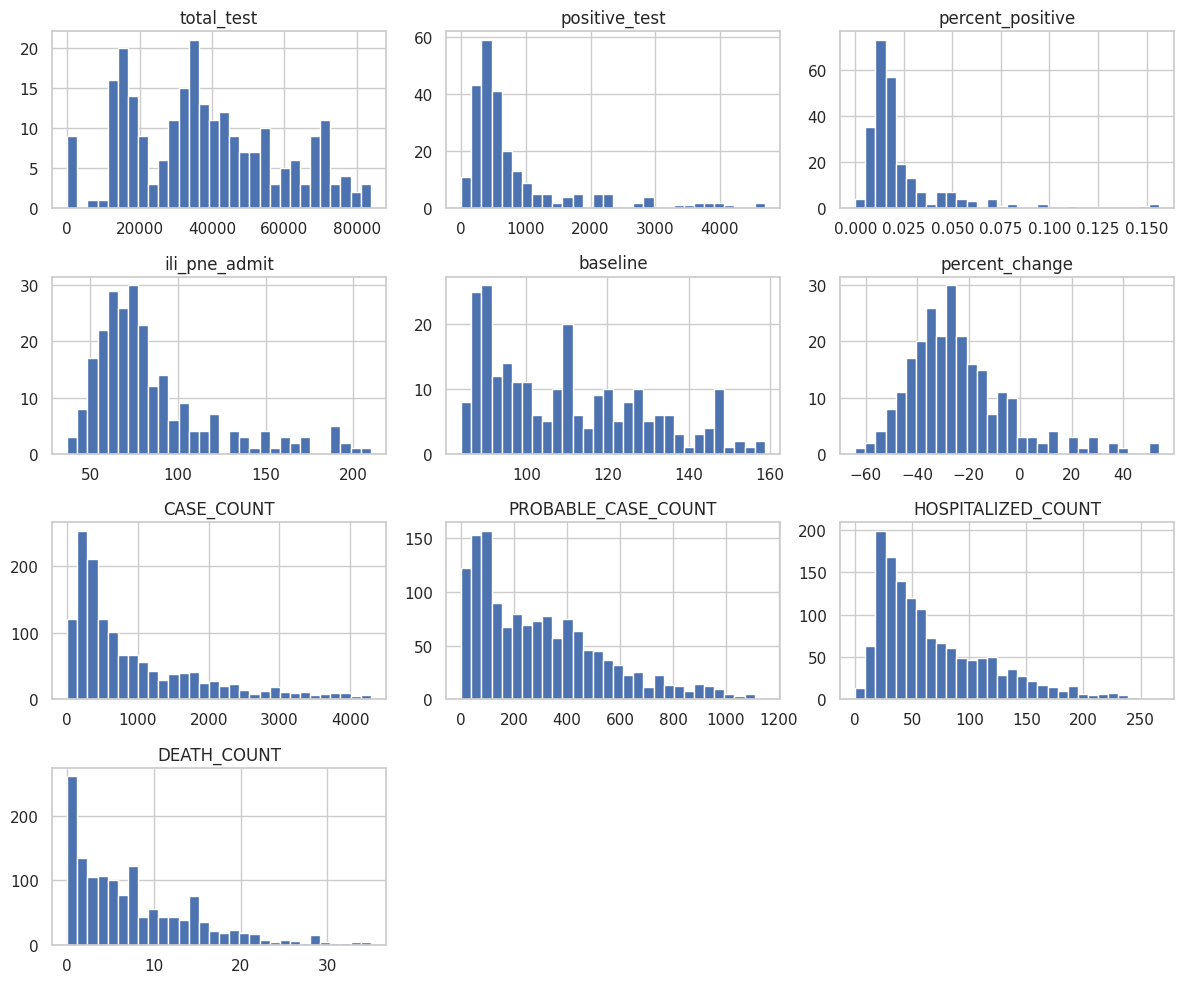

In [62]:
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="whitegrid")

# Plot histograms for numerical columns
numerical_cols = ['total_test', 'positive_test', 'percent_positive', 'ili_pne_admit', 'baseline', 'percent_change', 'CASE_COUNT', 'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']

merged_data[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# **Data Exploration**

In [63]:
# 1. Convert 'DATE' and 'UptDate' to datetime type
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'], errors='coerce')
merged_data.dtypes

,0
DATE,datetime64[ns]
total_test,float64
positive_test,float64
percent_positive,float64
UptDate,object
ili_pne_admit,float64
baseline,float64
percent_change,float64
status,object
ETLdate,object


In [64]:
numerical_cols = ['total_test', 'positive_test', 'percent_positive', 'ili_pne_admit', 'baseline',
                  'percent_change', 'CASE_COUNT', 'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT','DEATH_COUNT', 'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG',
       'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG']
# 4. Detect and handle outliers for numerical columns using IQR
Q1 = merged_data[numerical_cols].quantile(0.25)
Q3 = merged_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [65]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [66]:
# Filter out outliers (values outside the IQR range)
merged_data = merged_data[~((merged_data[numerical_cols] < lower_bound) | (merged_data[numerical_cols] > upper_bound)).any(axis=1)]

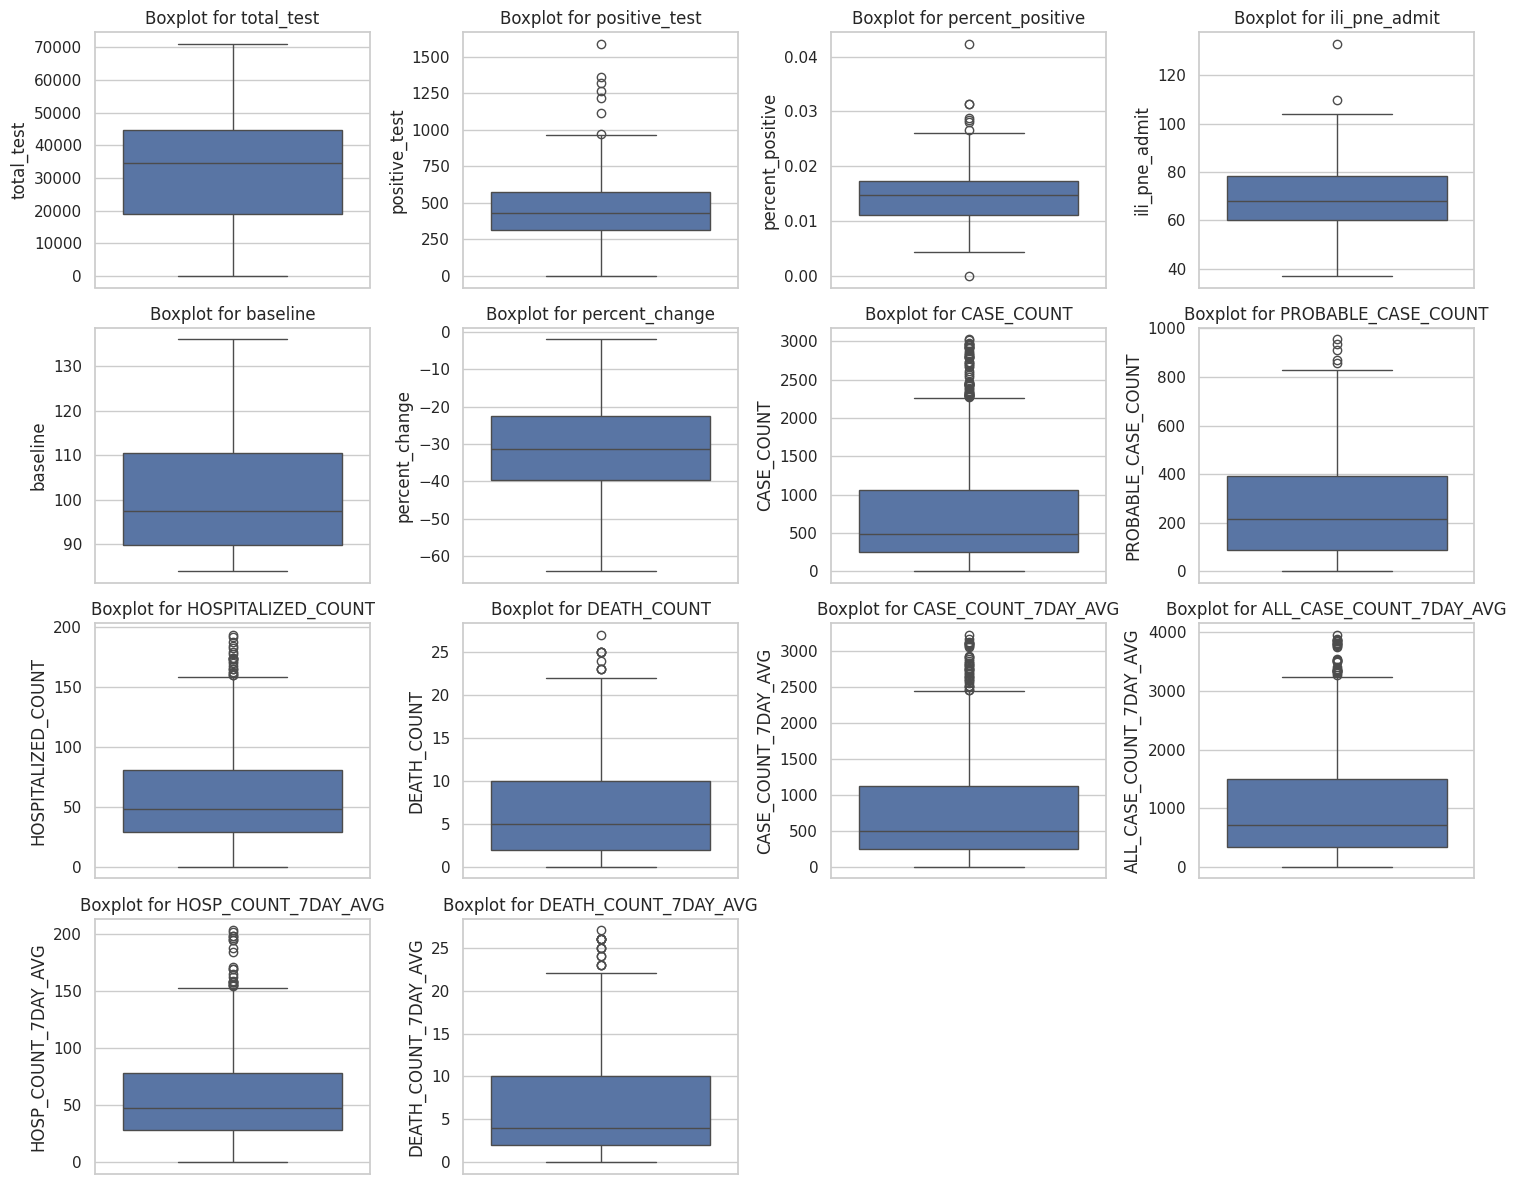

In [69]:
import matplotlib.pyplot as plt # Import the pyplot submodule as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(15, 12))

# Loop through each numerical column to create individual boxplots
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Create a grid of 4x4 subplots
    sns.boxplot(data=merged_data[col])
    plt.title(f"Boxplot for {col}")
    plt.xticks(rotation=45)

# Adjust the layout to make it more readable
plt.tight_layout()
plt.show()

In [70]:
# Check for duplicates and remove them
merged_data = merged_data.drop_duplicates()

# Inspect the cleaned dataset
print("Cleaned Data:")
print(merged_data.head())

Cleaned Data:
          DATE  total_test  positive_test  percent_positive  \
0   2020-02-29         NaN            NaN               NaN   
1   2020-03-01         2.0            0.0            0.0000   
107 2020-06-15     37039.0          641.0            0.0173   
108 2020-06-16     35295.0          626.0            0.0177   
109 2020-06-17     29722.0          534.0            0.0180   

                    UptDate  ili_pne_admit    baseline  percent_change  \
0                      None            NaN         NaN             NaN   
1    03/17/2021 02:14:56 PM          133.0  135.952381            -2.2   
107  03/17/2021 02:17:33 PM           50.0  109.000000           -54.1   
108  03/17/2021 02:17:34 PM           53.0  109.714286           -51.7   
109  03/17/2021 02:17:34 PM           64.0  109.809524           -41.7   

     status                       ETLdate  CASE_COUNT  PROBABLE_CASE_COUNT  \
0      None                          None           1                    0   
1    I

In [71]:
# Display the summary of cleaned data
print("Missing Values After Cleaning:")
print(merged_data.isnull().sum())

Missing Values After Cleaning:
DATE                          0
total_test                 1056
positive_test              1056
percent_positive           1056
UptDate                    1056
ili_pne_admit              1056
baseline                   1056
percent_change             1056
status                     1056
ETLdate                    1056
CASE_COUNT                    0
PROBABLE_CASE_COUNT           0
HOSPITALIZED_COUNT            0
DEATH_COUNT                   0
CASE_COUNT_7DAY_AVG           0
ALL_CASE_COUNT_7DAY_AVG       0
HOSP_COUNT_7DAY_AVG           0
DEATH_COUNT_7DAY_AVG          0
dtype: int64


# **SQL Queries**

In [72]:
 # Checking if the tables were created in the SQLite database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:", tables)

Tables in the database:           name
0  merged_data


In [73]:
import sqlite3
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/merged_dataset.csv')

# Connect to an SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('covid_data.db')

# Write the DataFrame to a table named 'merged_data' in SQLite
df.to_sql('merged_data', conn, if_exists='replace', index=False)


1711

In [74]:
# Check columns in dataset1 table
print("Columns in dataset1 table:")
print(pd.read_sql_query("PRAGMA table_info(dataset1);", conn))

# Check columns in dataset2 table
print("Columns in dataset2 table:")
print(pd.read_sql_query("PRAGMA table_info(dataset2);", conn))

# Check columns in dataset3 table
print("Columns in dataset3 table:")
print(pd.read_sql_query("PRAGMA table_info(dataset3);", conn))

Columns in dataset1 table:
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []
Columns in dataset2 table:
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []
Columns in dataset3 table:
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []


**SQL Query 1: Aggregate monthly data for cases, hospitalizations, and deaths**

In [75]:
merged_data.to_csv('merged_data', index=False)
print(merged_data.head())

query1 = """
SELECT
    strftime('%Y-%m', DATE) AS month,
    SUM(CASE_COUNT) AS total_cases,
    SUM(HOSPITALIZED_COUNT) AS total_hospitalizations,
    SUM(DEATH_COUNT) AS total_deaths
FROM merged_data
GROUP BY month
ORDER BY month;
"""

# Display the result
monthly_data = pd.read_sql_query(query1, conn)
print("Monthly Aggregated Data:")
print(monthly_data)

          DATE  total_test  positive_test  percent_positive  \
0   2020-02-29         NaN            NaN               NaN   
1   2020-03-01         2.0            0.0            0.0000   
107 2020-06-15     37039.0          641.0            0.0173   
108 2020-06-16     35295.0          626.0            0.0177   
109 2020-06-17     29722.0          534.0            0.0180   

                    UptDate  ili_pne_admit    baseline  percent_change  \
0                      None            NaN         NaN             NaN   
1    03/17/2021 02:14:56 PM          133.0  135.952381            -2.2   
107  03/17/2021 02:17:33 PM           50.0  109.000000           -54.1   
108  03/17/2021 02:17:34 PM           53.0  109.714286           -51.7   
109  03/17/2021 02:17:34 PM           64.0  109.809524           -41.7   

     status                       ETLdate  CASE_COUNT  PROBABLE_CASE_COUNT  \
0      None                          None           1                    0   
1    Insert  03/29/2

**SQL Query 2: Filter data where positive test rate is above 50%**

In [76]:
query2 = """
SELECT DATE, total_test, positive_test, percent_positive
FROM merged_data
WHERE percent_positive > 50;
"""
high_positive_rate = pd.read_sql_query(query2, conn)
print("\nHigh Positive Rate Data:")
print(high_positive_rate)


High Positive Rate Data:
Empty DataFrame
Columns: [DATE, total_test, positive_test, percent_positive]
Index: []


**SQL Query 3: Average hospitalization rate per month**

In [77]:
query3 = """
SELECT
    strftime('%Y-%m', DATE) AS month,
    AVG(HOSPITALIZED_COUNT) AS avg_hospitalizations
FROM merged_data
GROUP BY month;
"""
avg_hospitalizations = pd.read_sql_query(query3, conn)
print("\nAverage Hospitalizations by Month:")
print(avg_hospitalizations)


Average Hospitalizations by Month:
      month  avg_hospitalizations
0   2020-02              1.000000
1   2020-03            597.935484
2   2020-04            928.900000
3   2020-05            127.225806
4   2020-06             51.133333
5   2020-07             37.258065
6   2020-08             30.903226
7   2020-09             30.900000
8   2020-10             50.548387
9   2020-11            107.833333
10  2020-12            249.451613
11  2021-01            369.806452
12  2021-02            329.357143
13  2021-03            278.903226
14  2021-04            179.900000
15  2021-05             56.870968
16  2021-06             25.000000
17  2021-07             42.129032
18  2021-08            108.354839
19  2021-09             87.500000
20  2021-10             53.677419
21  2021-11             52.166667
22  2021-12            396.129032
23  2022-01            596.193548
24  2022-02             81.535714
25  2022-03             29.129032
26  2022-04             53.400000
27  2022-05 

**SQL Query 4: Total cases and tests per day**

In [78]:
query4 = """
SELECT DATE, CASE_COUNT AS daily_cases, total_test AS daily_tests
FROM merged_data
ORDER BY DATE;
"""
daily_cases_tests = pd.read_sql_query(query4, conn)
print("\nDaily Cases and Tests Data:")
print(daily_cases_tests)


Daily Cases and Tests Data:
            DATE  daily_cases  daily_tests
0     2020-02-29            1          NaN
1     2020-03-01            0          2.0
2     2020-03-02            0          5.0
3     2020-03-03            1         14.0
4     2020-03-04            5         33.0
...          ...          ...          ...
1706  2024-10-31          120          NaN
1707  2024-11-01          106          NaN
1708  2024-11-02           62          NaN
1709  2024-11-03           63          NaN
1710  2024-11-04           59          NaN

[1711 rows x 3 columns]


**SQL Query 5: Baseline Data Per Day**

In [79]:
query5 = """
SELECT DATE, baseline
FROM merged_data
ORDER BY DATE;
"""
baseline_data = pd.read_sql_query(query5, conn)
print("\nBaseline Data Per Day:")
print(baseline_data)


Baseline Data Per Day:
            DATE    baseline
0     2020-02-29         NaN
1     2020-03-01  135.952381
2     2020-03-02  134.000000
3     2020-03-03  133.809524
4     2020-03-04  135.714286
...          ...         ...
1706  2024-10-31         NaN
1707  2024-11-01         NaN
1708  2024-11-02         NaN
1709  2024-11-03         NaN
1710  2024-11-04         NaN

[1711 rows x 2 columns]


**SQL Query 6: Percentage Change Data Per Day**

In [80]:
query6 = """
SELECT DATE, percent_change
FROM merged_data
ORDER BY DATE;
"""
percent_change_data = pd.read_sql_query(query6, conn)
print("\nPercentage Change Data Per Day:")
print(percent_change_data)


Percentage Change Data Per Day:
            DATE  percent_change
0     2020-02-29             NaN
1     2020-03-01            -2.2
2     2020-03-02            40.3
3     2020-03-03            30.0
4     2020-03-04            12.7
...          ...             ...
1706  2024-10-31             NaN
1707  2024-11-01             NaN
1708  2024-11-02             NaN
1709  2024-11-03             NaN
1710  2024-11-04             NaN

[1711 rows x 2 columns]


# **Data Visualization**

**Scatter Plot: Total Tests vs Positive Tests**

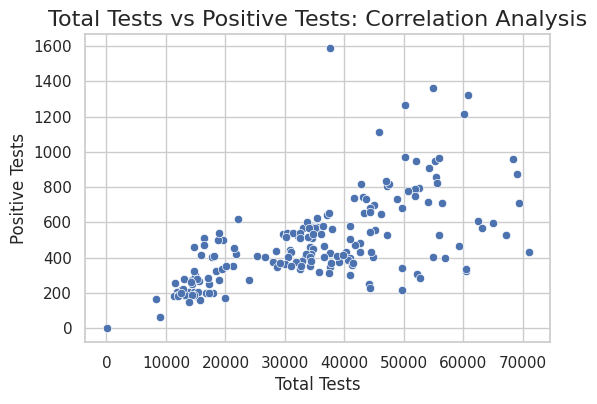

In [81]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_test', y='positive_test', data=merged_data)
plt.title('Total Tests vs Positive Tests: Correlation Analysis', fontsize=16)
plt.xlabel('Total Tests', fontsize=12)
plt.ylabel('Positive Tests', fontsize=12)
plt.show()

**Line Plot: Hospitalized Count Over Time**

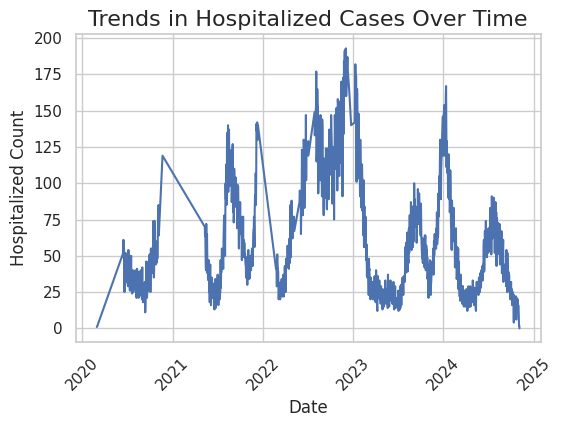

In [82]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='DATE', y='HOSPITALIZED_COUNT', data=merged_data)
plt.title('Trends in Hospitalized Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Hospitalized Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Box Plot: Death Count Distribution by Status**

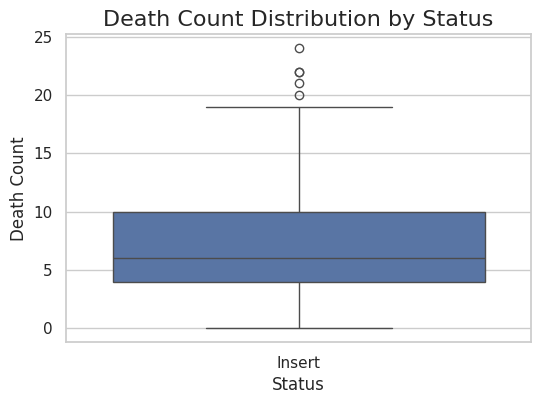

In [83]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='status', y='DEATH_COUNT', data=merged_data)
plt.title('Death Count Distribution by Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Death Count', fontsize=12)
plt.show()

**Correlation Heatmap: Total Tests, Positive Tests, Percent Positive**

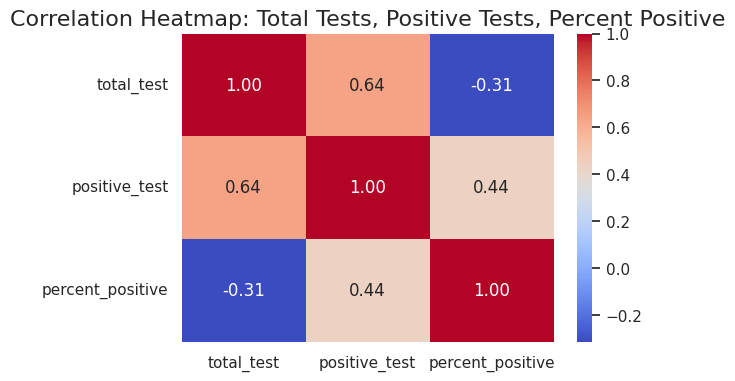

In [84]:
correlation = merged_data[['total_test', 'positive_test', 'percent_positive']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap: Total Tests, Positive Tests, Percent Positive', fontsize=16)
plt.show()

**Pair Plot: Relationships Between Key Numerical Variables**

In [128]:
import plotly.graph_objects as go

# Create a line plot using Plotly
fig = go.Figure()

# Add traces for daily values
fig.add_trace(go.Scatter(x=merged_data['UptDate'], y=merged_data['CASE_COUNT'],
                         mode='lines', name='Daily Cases', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=merged_data['UptDate'], y=merged_data['HOSPITALIZED_COUNT'],
                         mode='lines', name='Daily Hospitalizations', line=dict(color='green')))
fig.add_trace(go.Scatter(x=merged_data['UptDate'], y=merged_data['DEATH_COUNT'],
                         mode='lines', name='Daily Deaths', line=dict(color='red')))

# Add traces for 7-day averages
fig.add_trace(go.Scatter(x=merged_data['UptDate'], y=merged_data['CASE_COUNT_7DAY_AVG'],
                         mode='lines', name='7-Day Avg Cases', line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=merged_data['UptDate'], y=merged_data['HOSP_COUNT_7DAY_AVG'],
                         mode='lines', name='7-Day Avg Hospitalizations', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=merged_data['UptDate'], y=merged_data['DEATH_COUNT_7DAY_AVG'],
                         mode='lines', name='7-Day Avg Deaths', line=dict(color='red', dash='dash')))

# Customize the layout
fig.update_layout(title='Comparison of Daily Values and 7-Day Averages',
                  xaxis_title='Date',
                  yaxis_title='Count',
                  legend_title='Legend')

# Show the plot
fig.show()


In [125]:

fig = px.bar(monthly_data, x='UptDate', y='CASE_COUNT',
             title='Monthly COVID-19 Cases')
fig.update_layout(xaxis_title='Month', yaxis_title='Total Cases')
fig.show()


In [109]:
merged_data.dtypes

,0
positive_test,float64
percent_positive,float64
UptDate,object
ili_pne_admit,float64
baseline,float64
percent_change,float64
status,object
ETLdate,object
CASE_COUNT,float64
PROBABLE_CASE_COUNT,float64


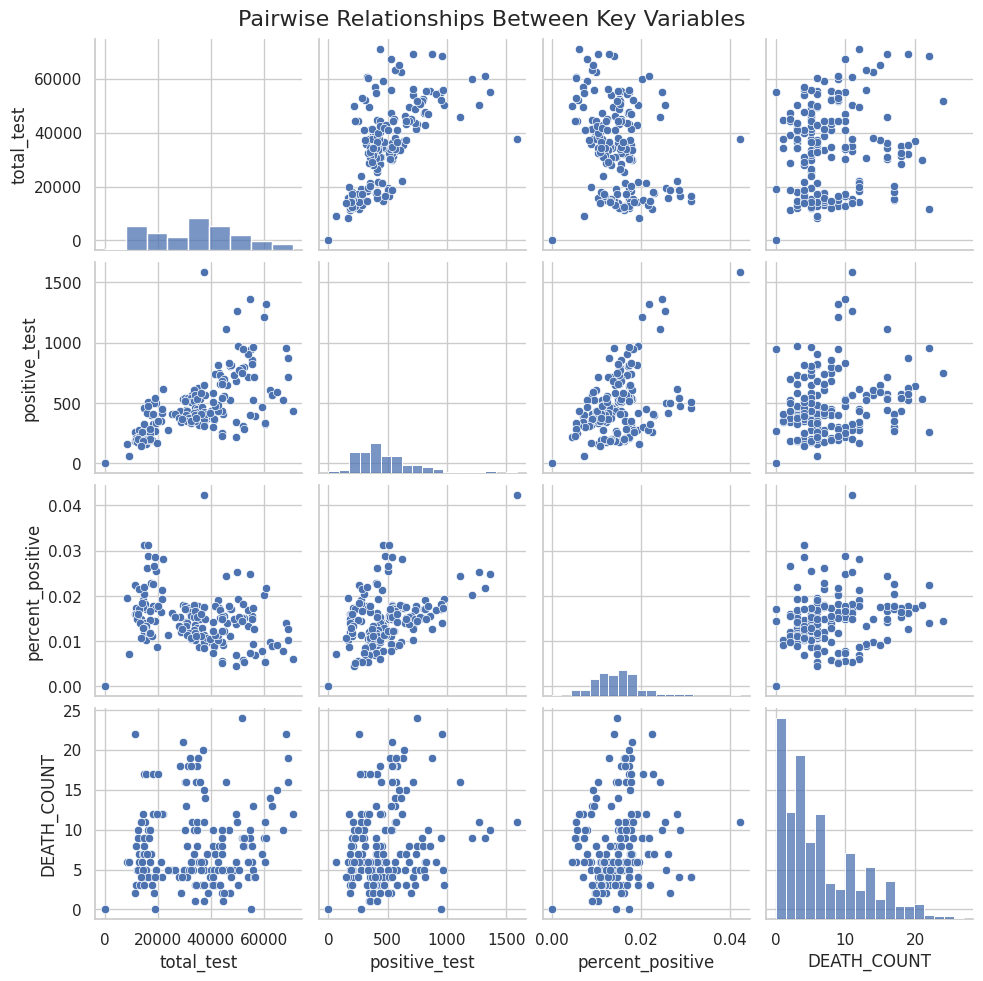

In [85]:
sns.pairplot(merged_data[['total_test', 'positive_test', 'percent_positive', 'DEATH_COUNT']])
plt.suptitle('Pairwise Relationships Between Key Variables', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

**Facet Grid: Hospitalized vs Death Count by Status**

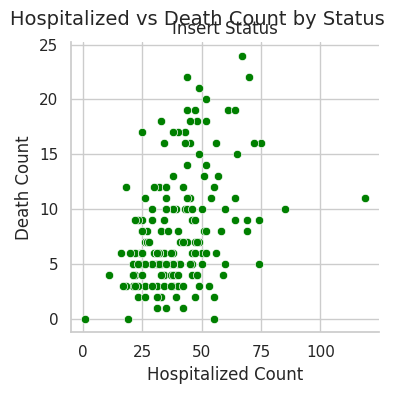

In [86]:
g = sns.FacetGrid(merged_data, col="status", height=4, aspect=1)
g.map(sns.scatterplot, 'HOSPITALIZED_COUNT', 'DEATH_COUNT', color="green")
g.set_axis_labels('Hospitalized Count', 'Death Count')
g.set_titles("{col_name} Status")
plt.suptitle('Hospitalized vs Death Count by Status', fontsize=14)
plt.show()

**Line Graph: Case Count Over Time**

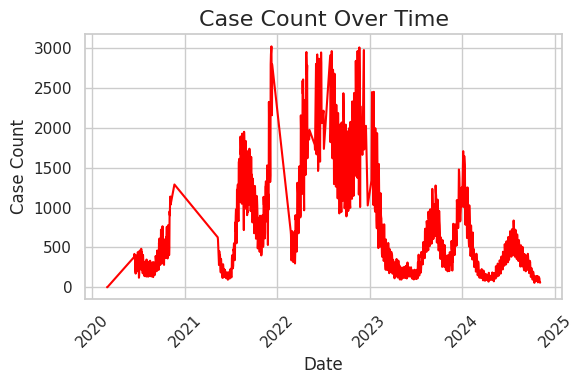

In [87]:
# Line graph showing CASE_COUNT over time
plt.figure(figsize=(6, 4))
sns.lineplot(x='DATE', y='CASE_COUNT', data=merged_data, color='red')
plt.title('Case Count Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Case Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Violin Plot: Distribution of Death Count by Hospitalized Count**

<ipython-input-88-9c2dc0ee2e2d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HOSPITALIZED_COUNT', y='DEATH_COUNT', data=filtered_data, palette="coolwarm")


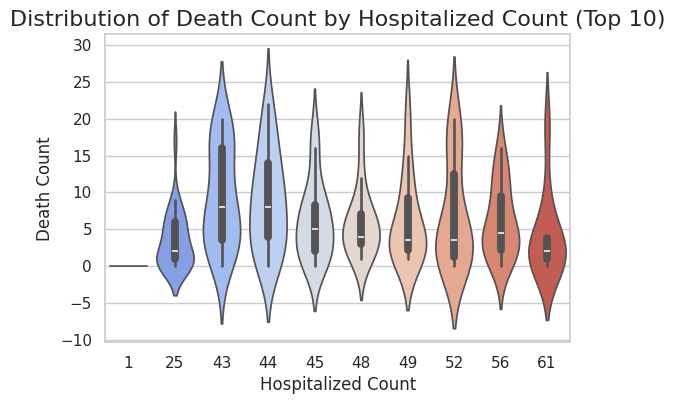

In [88]:
# Violin plot of DEATH_COUNT distribution by HOSPITALIZED_COUNT for the first 10 unique HOSPITALIZED_COUNT values
top_10_hospitalized = merged_data['HOSPITALIZED_COUNT'].dropna().unique()[:10]
filtered_data = merged_data[merged_data['HOSPITALIZED_COUNT'].isin(top_10_hospitalized)]

# Plot
plt.figure(figsize=(6, 4))
sns.violinplot(x='HOSPITALIZED_COUNT', y='DEATH_COUNT', data=filtered_data, palette="coolwarm")
plt.title('Distribution of Death Count by Hospitalized Count (Top 10)', fontsize=16)
plt.xlabel('Hospitalized Count', fontsize=12)
plt.ylabel('Death Count', fontsize=12)
plt.show()

**Trends in Daily COVID-19 Confirmed Cases and Hospitalizations**

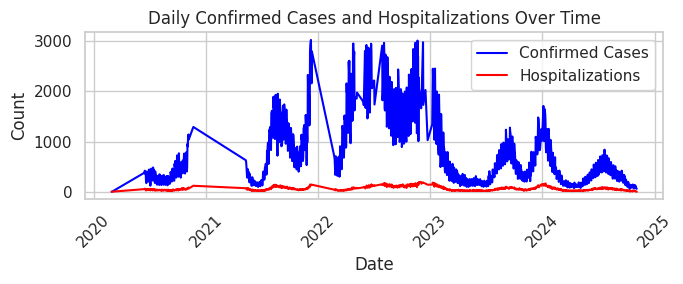

In [89]:
# Ensure the 'DATE' column is in datetime format
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

plt.figure(figsize=(7, 3))
plt.plot(merged_data['DATE'], merged_data['CASE_COUNT'], label='Confirmed Cases', color='blue')
plt.plot(merged_data['DATE'], merged_data['HOSPITALIZED_COUNT'], label='Hospitalizations', color='red')
plt.title('Daily Confirmed Cases and Hospitalizations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')

# Display legend
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Monthly Trend of COVID-19 Cases, Hospitalizations, and Deaths**

<ipython-input-90-0875973b5483>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = merged_data.resample('M', on='DATE').sum()  # assuming 'DATE' column is set to datetime type


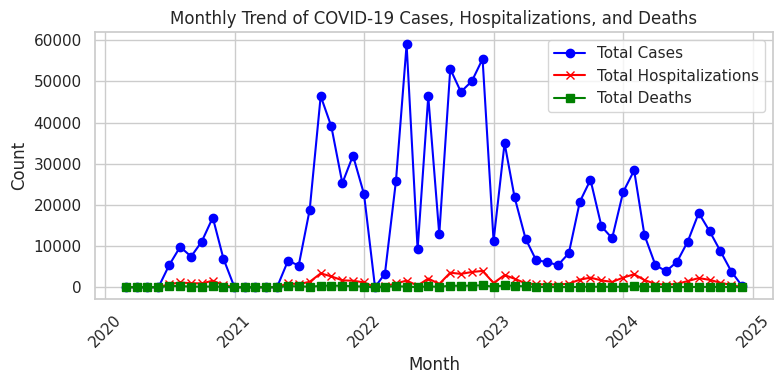

In [90]:
# Aggregating data by month for your dataset
monthly_data = merged_data.resample('M', on='DATE').sum()  # assuming 'DATE' column is set to datetime type

# Plotting monthly total cases, hospitalizations, and deaths
plt.figure(figsize=(8, 4))
plt.plot(monthly_data.index, monthly_data['CASE_COUNT'], label='Total Cases', marker='o', color='blue')

# Plot monthly total hospitalizations
plt.plot(monthly_data.index, monthly_data['HOSPITALIZED_COUNT'], label='Total Hospitalizations', marker='x', color='red')

# Plot monthly total deaths
plt.plot(monthly_data.index, monthly_data['DEATH_COUNT'], label='Total Deaths', marker='s', color='green')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Trend of COVID-19 Cases, Hospitalizations, and Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Average Daily Hospitalizations Due to COVID-19**

<ipython-input-91-0d3af825cfc9>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


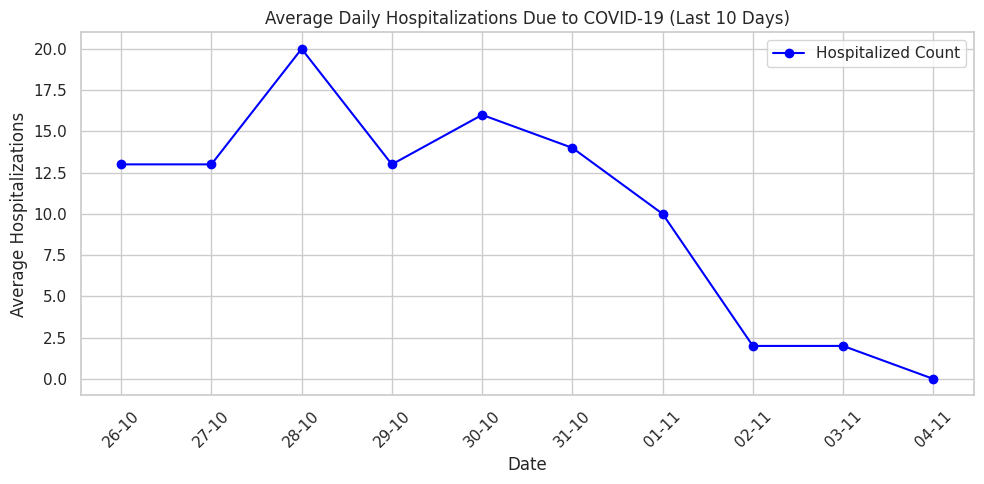

In [91]:
merged_data.set_index('DATE', inplace=True)

all_dates = pd.date_range(start=merged_data.index.min(), end=merged_data.index.max())
merged_data = merged_data.reindex(all_dates)
merged_data.fillna(method='ffill', inplace=True)

last_10_dates = merged_data.tail(10)

plt.figure(figsize=(10, 5))
plt.plot(last_10_dates.index, last_10_dates['HOSPITALIZED_COUNT'], marker='o', label='Hospitalized Count', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Hospitalizations')
plt.title('Average Daily Hospitalizations Due to COVID-19 (Last 10 Days)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick interval to every 1 day

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

**Correlation Matrix**

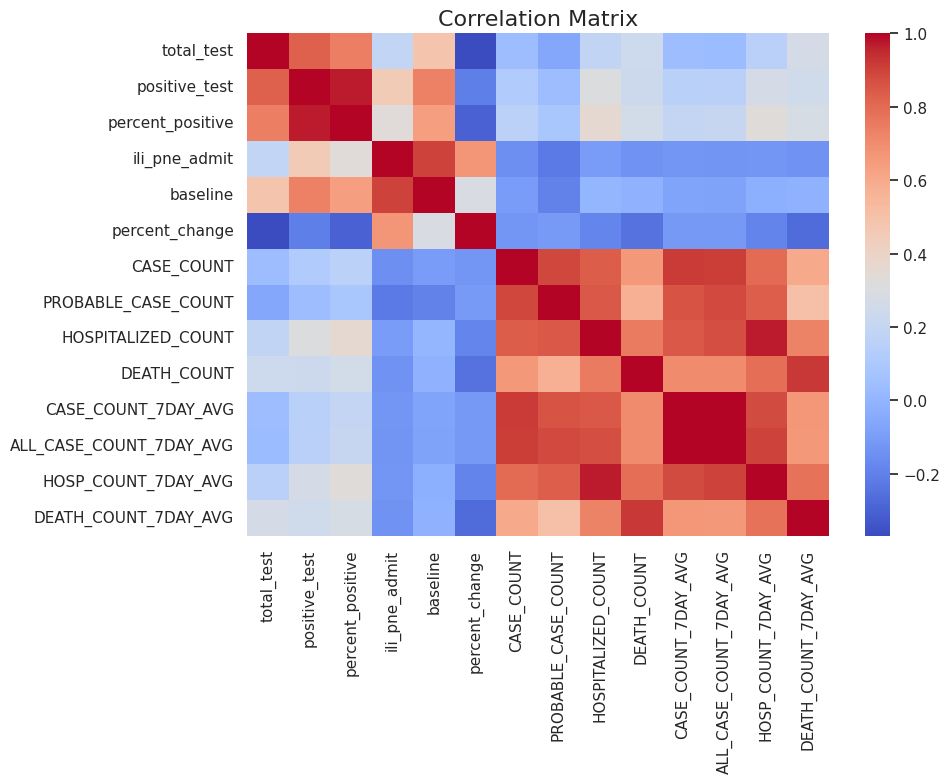

In [92]:
# numerical columns from the dataset
numerical_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()